In [1]:
import numpy as np
from sklearn import datasets, linear_model
import matplotlib.pyplot as plt
from NeuralNetwork import NeuralNetwork
import common

In [2]:
np.random.seed(0)
X, y = datasets.make_moons(200, noise=0.20)

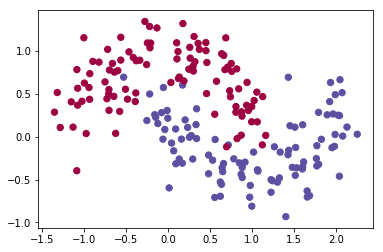

In [3]:
plt.scatter(X[:,0], X[:,1], s=40, c=y, cmap=plt.cm.Spectral)

In [4]:
clf = linear_model.LogisticRegressionCV()
clf.fit(X, y)

/home/arthur.xw/.local/share/virtualenvs/ml-FhzBcel1/lib/python3.6/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


LogisticRegressionCV(Cs=10, class_weight=None, cv='warn', dual=False,
           fit_intercept=True, intercept_scaling=1.0, max_iter=100,
           multi_class='warn', n_jobs=None, penalty='l2',
           random_state=None, refit=True, scoring=None, solver='lbfgs',
           tol=0.0001, verbose=0)

In [5]:
def plot_decision_boundary(pred_func):
 
    x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
    y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
    h = 0.01
 
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    tmp = np.c_[xx.ravel(), yy.ravel()]
    print(f"X: {tmp}, shape: {tmp.shape}")
    Z = pred_func(tmp)
    print(f"result: {Z}")
    Z = Z.reshape(xx.shape)
 
    plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral)
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Spectral)

X: [[-1.85462041 -1.43206382]
 [-1.84462041 -1.43206382]
 [-1.83462041 -1.43206382]
 ...
 [ 2.72537959  1.83793618]
 [ 2.73537959  1.83793618]
 [ 2.74537959  1.83793618]], shape: (151208, 2)
result: [1 1 1 ... 0 0 0]


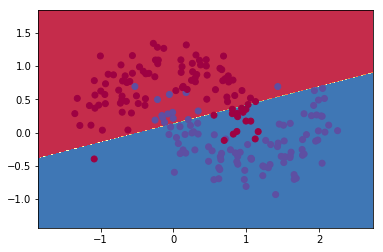

In [6]:
plot_decision_boundary(clf.predict)

In [18]:
nn = NeuralNetwork([2, 3, 4, 5, 2], common.tanh, common.tanh_deriv)

In [19]:
nn.fit(X, y)

In [20]:
x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
h = 0.01
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
tmp = np.c_[xx.ravel(), yy.ravel()]
predictions = []
for i in range(tmp.shape[0]):
    o = nn.predict(tmp[i])
    predictions.append(np.argmax(o))

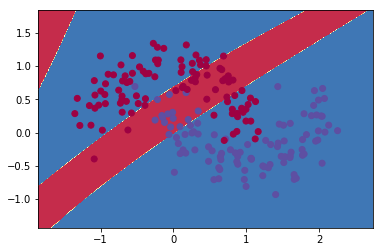

In [21]:
predictions = np.array(predictions)
predictions = predictions.reshape(xx.shape)
 
plt.contourf(xx, yy, predictions, cmap=plt.cm.Spectral)
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Spectral)